# Importing Libraries

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image
import math
import pylab

lenna Link: 
https://drive.google.com/file/d/1EA-AzEuBMjulvWmOBiBb2HaxypaVyY1C/view?usp=share_link

In [2]:
img = cv2.imread(r'C:\Users\Function\Desktop\lenna.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1) Add Noise:-

## Uniform Noise:

In [3]:
def Uniform_Noise(img, mean, std):

    noise_dist = np.random.uniform(mean, std, img.shape) 
    
    # noise matrix in shape of the image 
    noise_matrix = noise_dist.reshape(img.shape)  
    
    # image with added noise
    noisy_image = img + noise_matrix   
    
    # limit the result values in range of 0(min) : 255(max)
    noisy_image = np.clip(noisy_image, 0, 255)  
    
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

True

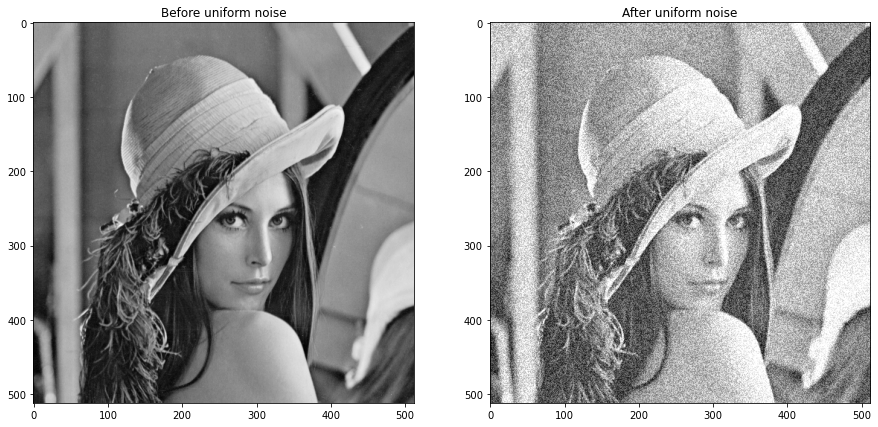

In [4]:
uniform_noise = Uniform_Noise(gray_img, 0, 100)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.title("Before uniform noise")
plt.imshow(gray_img, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.title("After uniform noise")
plt.imshow(uniform_noise, cmap='gray')


saved_Uniform = 'Uniform_Noise_image.jpg'

cv2.imwrite(saved_Uniform, uniform_noise)

## Gaussian Noise:

In [5]:
def Gaussian_Noise(img, mean, std):
    # normal distribuation of the noisee
    noise_dist = np.random.normal(mean, std, img.shape)
    
    # noise matrix in shape of the image
    noise_matrix = noise_dist.reshape(img.shape)   
    
    # image with added noise
    noisy_image = img + noise_matrix    
    
    # limit the result values in range of 0(min) : 255(max)
    noisy_image = np.clip(noisy_image, 0, 255)     
    
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

True

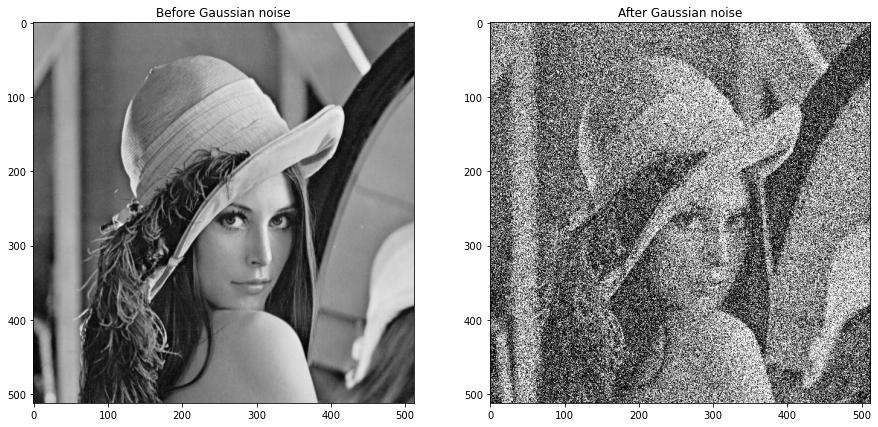

In [6]:
Gaussian_noise = Gaussian_Noise(gray_img, 0, 100)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.title("Before Gaussian noise")
plt.imshow(gray_img, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.title("After Gaussian noise")
plt.imshow(Gaussian_noise, cmap='gray')


saved_Gaussian = 'Gaussian_Noise_image.jpg'
cv2.imwrite(saved_Gaussian, Gaussian_noise)

## Salt and Pepper Noise:

In [7]:
def Salt_Pepper_Noise(image, prob):
    SP_noisy = np.zeros(image.shape,np.uint8) 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            random_pixs = np.random.random()
            if random_pixs < prob:
                SP_noisy[i][j] = 0
            elif random_pixs> (1 - prob):
                SP_noisy[i][j] = 255
            else:
                SP_noisy[i][j] = image[i][j]
    return SP_noisy

True

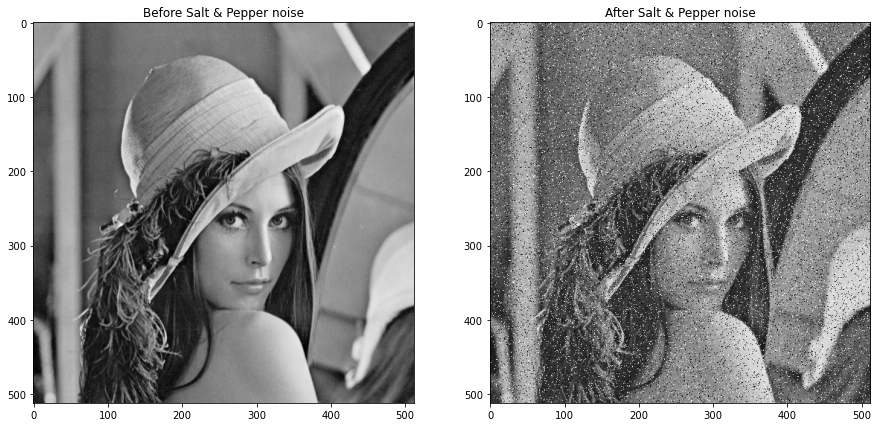

In [8]:
Salt_Pepper_noise = Salt_Pepper_Noise(gray_img, 0.05)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.title("Before Salt & Pepper noise")
plt.imshow(gray_img, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("After Salt & Pepper noise")
plt.imshow(Salt_Pepper_noise, cmap = 'gray')


saved_Salt_Pepper = 'Salt_Pepper_Noise_image.jpg'
cv2.imwrite(saved_Salt_Pepper, Salt_Pepper_noise)

# 2) Filter the noisy image using Low Pass Filters:-

In [9]:
figure_size = 9

## Average Filter:

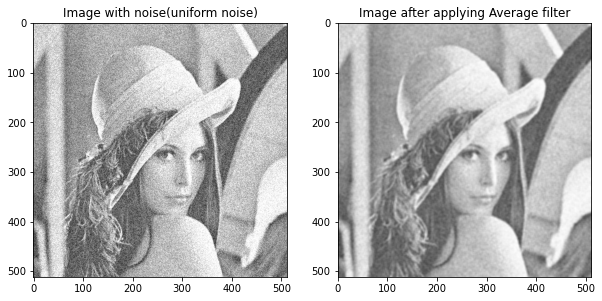

In [10]:
img_with_noise = cv2.imread('Uniform_Noise_image.jpg')
processed_image = cv2.blur(img_with_noise, (5, 5))

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1, 2, 1)
plt.title("Image with noise(uniform noise)")
plt.imshow(img_with_noise, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("Image after applying Average filter")
plt.imshow(processed_image, cmap = 'gray')

## Gaussian Filter:

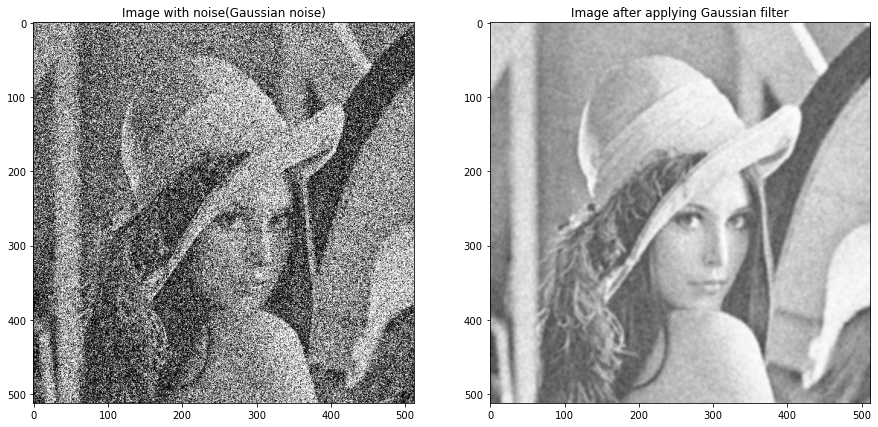

In [11]:
img_with_noise = cv2.imread('Gaussian_Noise_image.jpg')

new_image_gauss = cv2.GaussianBlur(img_with_noise, (figure_size, figure_size),0)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.title("Image with noise(Gaussian noise)")
plt.imshow(img_with_noise, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("Image after applying Gaussian filter")
plt.imshow(processed_image, cmap = 'gray')

## Median Filter:

In [12]:
img_with_noise = cv2.imread('Salt_Pepper_Noise_image.jpg')

new_image = cv2.medianBlur(img_with_noise, figure_size)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.title("Image with noise(Salt & Pepper noise)")
plt.imshow(img_with_noise, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("Image after applying Median filter")
plt.imshow(processed_image, cmap = 'gray')

# Edge Detection using:

building Link:
https://drive.google.com/file/d/1WzMnD7Qtru2_L-R8iZWVo-yTpnWUv29C/view?usp=share_link

In [13]:
img = cv2.imread(r'C:\Users\Function\Desktop\building.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Sobel Method:

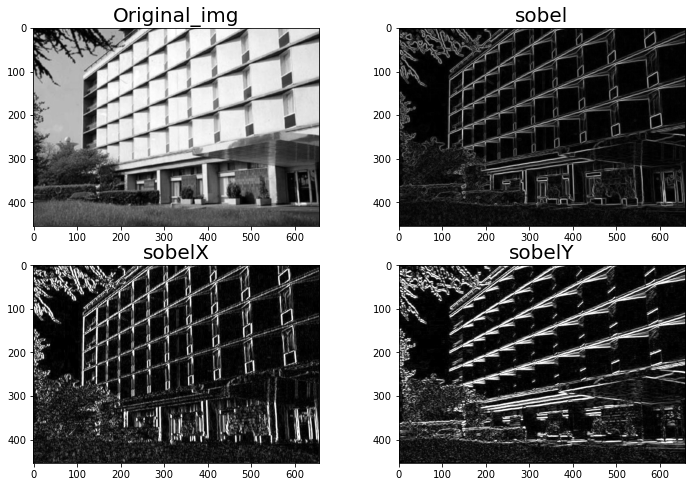

In [14]:
# Sobel Edge Detection
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1) # Sobel Edge Detection on the Y axis

sobel_x_img = cv2.convertScaleAbs(sobelx)
sobel_y_img = cv2.convertScaleAbs(sobely)

sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
sobel *= 255.0 / sobel.max()
sobel = cv2.convertScaleAbs(sobel)

# Display Sobel Edge Detection Images 
cv2.imshow('Sobel Magnitude Gradient', sobel)
cv2.waitKey(0)

pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1), pylab.imshow(gray_img, cmap='gray'), pylab.title('Original_img', size=20)
pylab.subplot(2,2,2), pylab.imshow(sobel, cmap='gray'), pylab.title('sobel', size=20);
pylab.subplot(2,2,3), pylab.imshow(sobel_x_img, cmap='gray'), pylab.title('sobelX', size=20)
pylab.subplot(2,2,4), pylab.imshow(sobel_y_img, cmap='gray'), pylab.title('sobelY', size=20);

In [15]:
cv2.imwrite("edge_images/sobelx.png",sobel_x_img)
cv2.imwrite("edge_images/sobely.png",sobel_y_img)
cv2.imwrite("edge_images/sobel.png",sobel)

False

## Roberts Method:

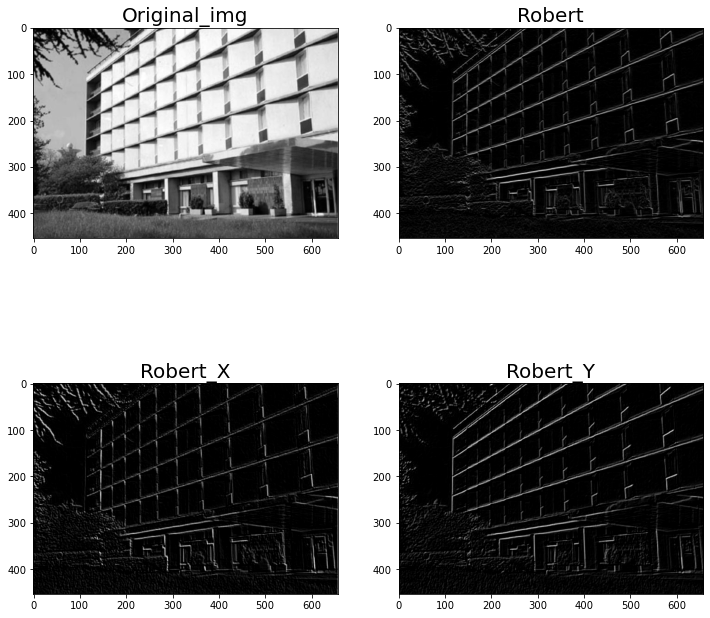

In [16]:
kernely = np.array( [[1, 0 ], [0,-1 ]] )
kernelx = np.array( [[ 0, 1 ], [ -1, 0 ]] )
robert_x = cv2.filter2D(gray_img, -1, kernelx)
robert_y = cv2.filter2D(gray_img, -1, kernely)

robert = robert_x + robert_y

cv2.imshow("Robert_X", robert_x)
cv2.imshow("Robert_Y", robert_y)
cv2.imshow("Robert",robert)

cv2.waitKey(0)
cv2.destroyAllWindows()

pylab.figure(figsize=(12,12))
pylab.subplot(2,2,1), pylab.imshow(gray_img, cmap='gray'), pylab.title('Original_img', size=20)
pylab.subplot(2,2,2), pylab.imshow(robert, cmap='gray'), pylab.title('Robert', size=20);
pylab.subplot(2,2,3), pylab.imshow(robert_x, cmap='gray'), pylab.title('Robert_X', size=20)
pylab.subplot(2,2,4), pylab.imshow(robert_y, cmap='gray'), pylab.title('Robert_Y', size=20);

In [17]:
cv2.imwrite("edge_images/robert_x.png",robert_x)
cv2.imwrite("edge_images/robert_y.png",robert_y)
cv2.imwrite("edge_images/robert.png",robert)

False

## Prewitt Method:

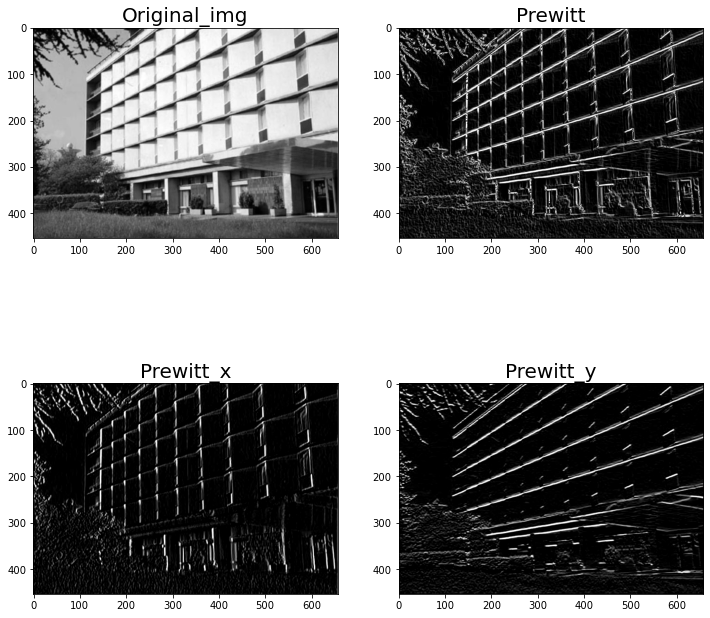

In [18]:
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(gray_img, -1, kernelx)
img_prewitty = cv2.filter2D(gray_img, -1, kernely)

prewitt = img_prewittx + img_prewitty

cv2.imshow("Prewitt X", img_prewittx)
cv2.imshow("Prewitt Y", img_prewitty)
cv2.imshow("Prewitt",prewitt)

cv2.waitKey(0)
cv2.destroyAllWindows()

pylab.figure(figsize=(12,12))
pylab.subplot(2,2,1), pylab.imshow(gray_img, cmap='gray'), pylab.title('Original_img', size=20)
pylab.subplot(2,2,2), pylab.imshow(prewitt, cmap='gray'), pylab.title('Prewitt', size=20);
pylab.subplot(2,2,3), pylab.imshow(img_prewittx, cmap='gray'), pylab.title('Prewitt_x', size=20)
pylab.subplot(2,2,4), pylab.imshow(img_prewitty, cmap='gray'), pylab.title('Prewitt_y', size=20);

In [19]:
cv2.imwrite("edge_images/prewitt_x.png",img_prewittx)
cv2.imwrite("edge_images/prewitt_y.png",img_prewitty)
cv2.imwrite("edge_images/prewitt.png",prewitt)

False

## Canny Method:

False

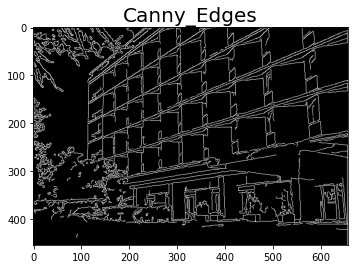

In [20]:
img_canny = cv2.Canny(gray_img,100,200)

cv2.imshow("Canny", img_canny)

cv2.waitKey(0)
cv2.destroyAllWindows()

pylab.imshow(img_canny, cmap='gray'), pylab.title('Canny_Edges', size=20);

cv2.imwrite("edge_images/Canny_Edges.png",img_canny)

# 4) Histogram and Distribution curve:-

## Histogram:

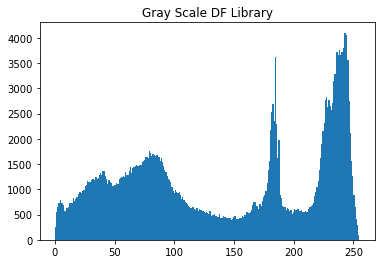

In [21]:
ax = plt.hist(gray_img.ravel(), bins = 256)
plt.title("Gray Scale DF Library")
plt.show()

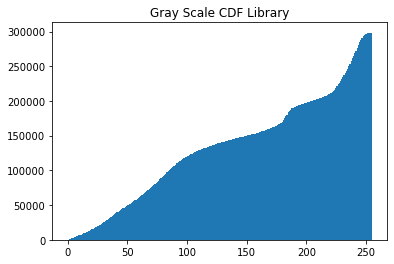

In [22]:
ax = plt.hist(gray_img.ravel(), bins = 256, cumulative=1)
plt.title("Gray Scale CDF Library")
plt.show()

## Distribution curve:

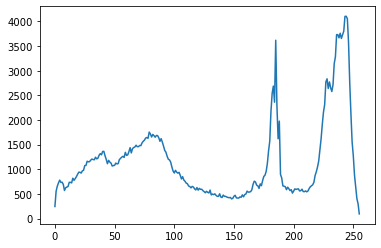

In [23]:
# find frequency of pixels in range 0-255
histr = cv2.calcHist([gray_img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

# 5) Equalize Image:

x-ray Link:
https://drive.google.com/file/d/1XMtRuOniHBtLsFi0WpjndTJMfpWLPCQB/view?usp=share_link

In [24]:
img = cv2.imread(r'C:\Users\Function\Desktop\x-ray.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

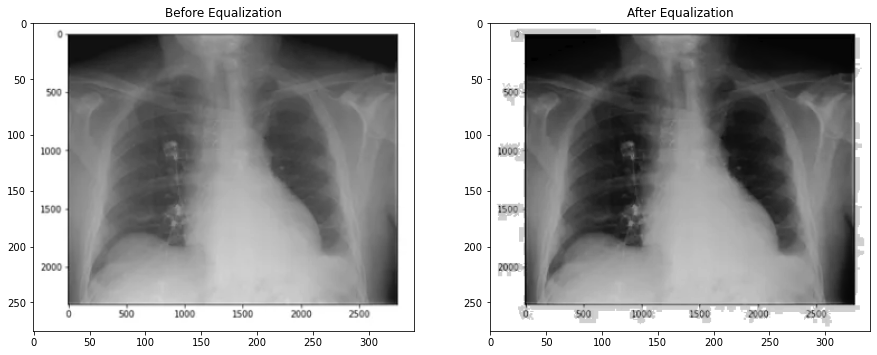

In [25]:
# creating a Histograms Equalization of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(gray_img)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.title("Before Equalization")
plt.imshow(gray_img, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("After Equalization")
plt.imshow(equ, cmap = 'gray')

# 6) Normalize Image:

fingerprint Link:
https://drive.google.com/file/d/11zV_AdUHTwGwztsCbPKP0PIxF_VwhWNq/view?usp=share_link

In [26]:
img = cv2.imread(r'C:\Users\Function\Desktop\fingerprint.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

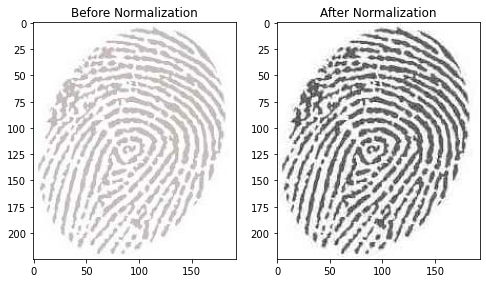

In [27]:
img_normalized = cv2.normalize(gray_img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

fig.add_subplot(1, 2, 1)
plt.title("Before Normalization")
plt.imshow(img, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("After Normalization")
plt.imshow(img_normalized, cmap = 'gray')

# 7) Local and Global thresholding:-

Sudoku Link:
https://drive.google.com/file/d/1buqZWVyF2IXA7D2CXPVn4JH4DwB_NB_i/view?usp=share_link

In [28]:
img = cv2.imread(r'C:\Users\Function\Desktop\Sudoku.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Local thresholding:

In [29]:
img_before_thresholding = cv2.medianBlur(gray_img,5)

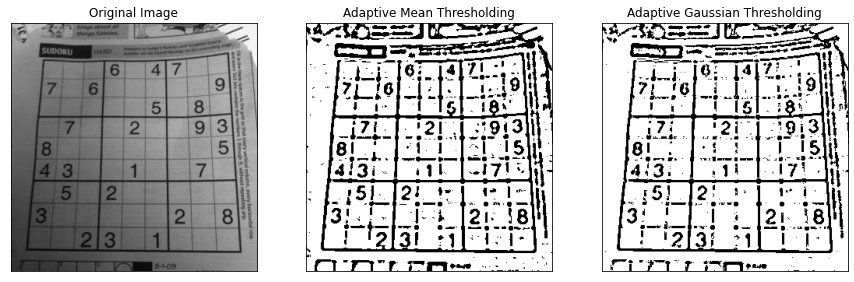

In [30]:
Adaptive_Mean_Thresholding = cv2.adaptiveThreshold(img_before_thresholding,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

Adaptive_Gaussian_Thresholding = cv2.adaptiveThreshold(img_before_thresholding,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,3,1),plt.imshow(gray_img,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(1,3,2),plt.imshow(Adaptive_Mean_Thresholding,'gray')
plt.title('Adaptive Mean Thresholding')
plt.xticks([]),plt.yticks([])

plt.subplot(1,3,3),plt.imshow(Adaptive_Gaussian_Thresholding,'gray')
plt.title('Adaptive Gaussian Thresholding')
plt.xticks([]),plt.yticks([])

plt.show()

## Global thresholding:

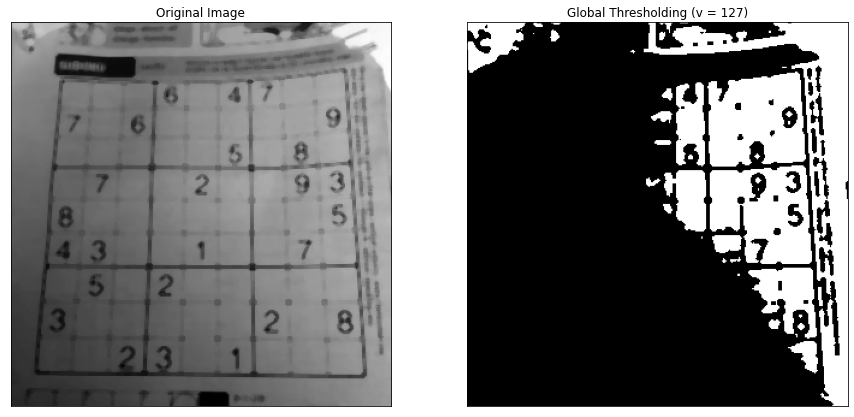

In [31]:
ret, Global_thresholding = cv2.threshold(img_before_thresholding,127,255,cv2.THRESH_BINARY)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,2,1),plt.imshow(img_before_thresholding,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(1,2,2),plt.imshow(Global_thresholding,'gray')
plt.title('Global Thresholding (v = 127)')
plt.xticks([]),plt.yticks([])

plt.show()

# 8) Transform from RGB to Gray scale and R, G, B histograms:-

## From BGR to Gray scale:

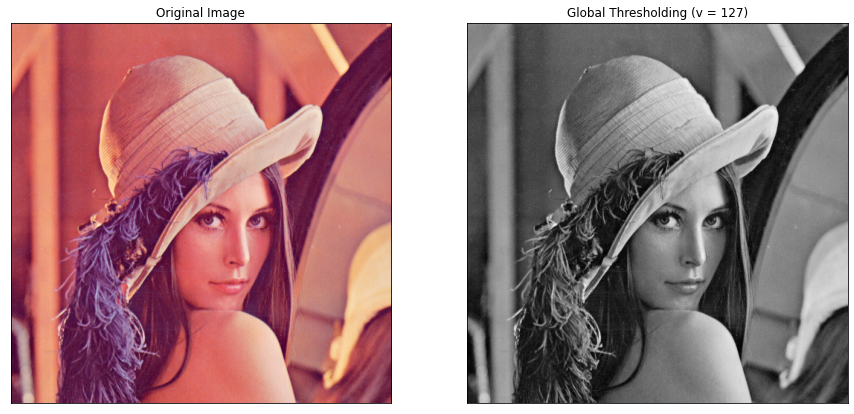

In [32]:
from skimage import io

image = io.imread(r'C:\Users\Function\Desktop\lenna.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(1,2,2),plt.imshow(gray_image,'gray')
plt.title('Global Thresholding (v = 127)')
plt.xticks([]),plt.yticks([])

plt.show()

## R, G, B histograms:

Text(0, 0.5, 'Pixel count')

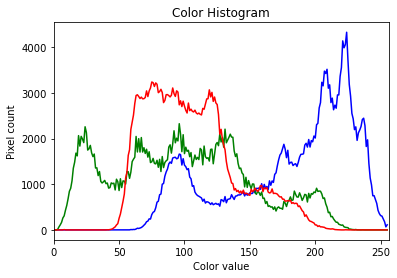

In [33]:
# tuple to select colors of each channel line
colors = ("blue", "green", "red")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

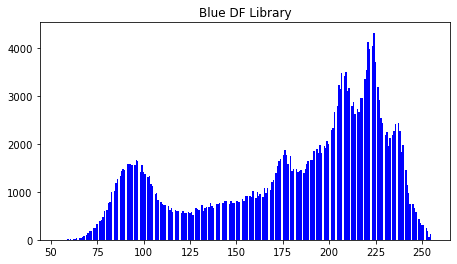

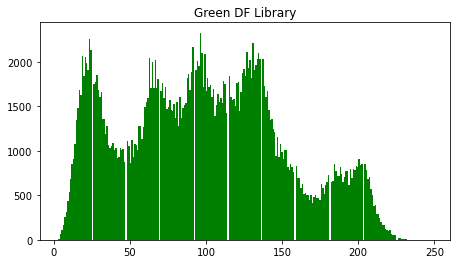

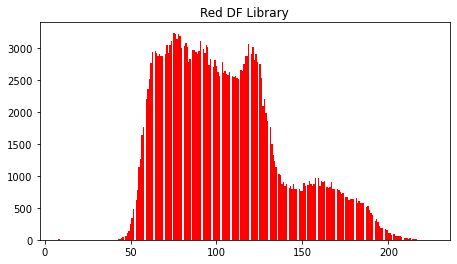

In [34]:
col = ('b','g','r')
c=0
bgr_planes = cv2.split(image)

for color in bgr_planes: # r, g and b
    cor = col[c]
    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(25)
    if cor == 'b':
        plt.subplot(1,3,1)
        plt.title("Blue DF Library")
        plt.hist(color.ravel(), bins = 256, color= 'b')
    if cor == 'g':
        plt.subplot(1,3,2)
        plt.title("Green DF Library")
        plt.hist(color.ravel(), bins = 256, color= 'g')
    if cor == 'r':
        plt.subplot(1,3,3)
        plt.title("Red DF Library")
        plt.hist(color.ravel(), bins = 256, color= 'r')
    
    c+=1

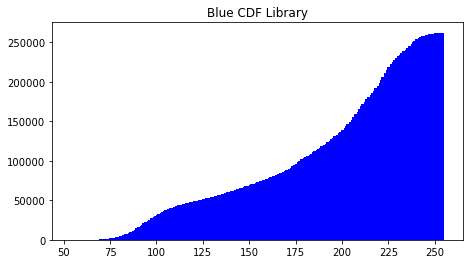

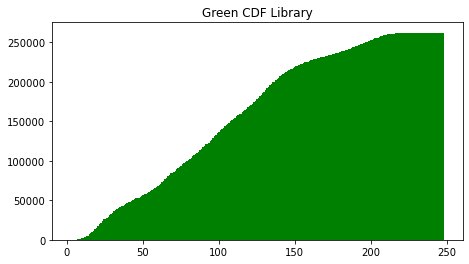

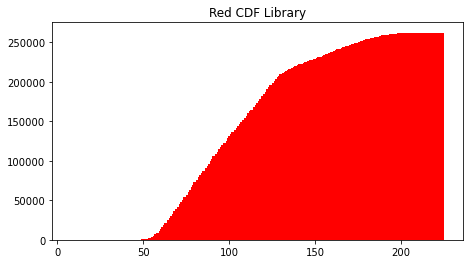

In [35]:
col = ('b','g','r')
c=0
bgr_planes = cv2.split(image)

for color in bgr_planes: # r, g and b
    cor = col[c]
    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(25)
    if cor == 'b':
        plt.subplot(1,3,1)
        plt.title("Blue CDF Library")
        plt.hist(color.ravel(), bins = 256, color = 'b', cumulative = 1)
    if cor == 'g':
        plt.subplot(1,3,2)
        plt.title("Green CDF Library")
        plt.hist(color.ravel(), bins = 256, color = 'g', cumulative = 1)
    if cor == 'r':
        plt.subplot(1,3,3)
        plt.title("Red CDF Library")
        plt.hist(color.ravel(), bins = 256, color = 'r', cumulative = 1)
    
    c+=1

# 9) Frequancy Domain Filter:-

## Low Pass and High Pass Filter:

girl Link:
https://drive.google.com/file/d/1pftzK5Lg3wHbivAzt8pHP9MhZH7JMvnR/view?usp=share_link
    
tiger Link:
https://drive.google.com/file/d/1ajYf-04d9twJ0nw82kIN3jtVO-ZcqhOT/view?usp=share_link

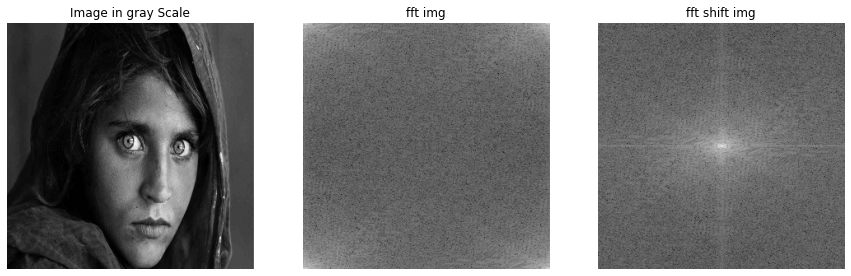

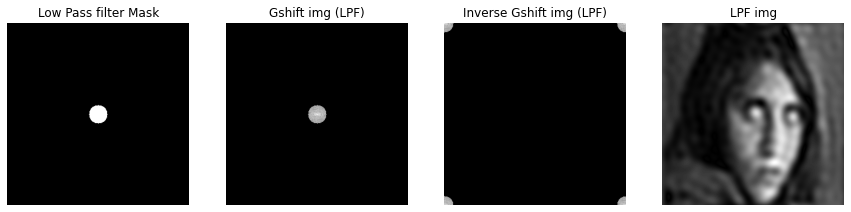

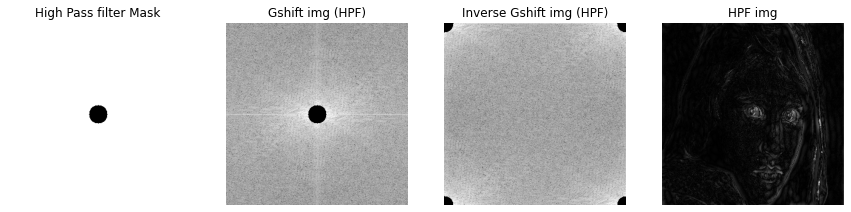

In [36]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# original image
img1 = cv2.imread(r'C:\Users\Function\Desktop\girl.jpg',0)
img1 = cv2.resize(img1, (300,300))

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,3,1)
plt.title("Image in gray Scale")
plt.imshow(img1, cmap='gray')
plt.axis('off')

# image in frequency domain
fft_img1 = np.fft.fft2(img1)
plt.subplot(1,3,2)
plt.title("fft img")
plt.imshow(np.log1p(np.abs(fft_img1)), cmap='gray')
plt.axis('off')

fft_shift_img1 = np.fft.fftshift(fft_img1)
plt.subplot(1,3,3)
plt.title("fft shift img")
plt.imshow(np.log1p(np.abs(fft_shift_img1)), cmap='gray')
plt.axis('off')
plt.show()

# Filter: Low pass filter
M,N = img1.shape
Low = np.zeros((M,N))

D0 = 15
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            Low[u,v] = 1
        else:
            Low[u,v] = 0
                    
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,4,1)
plt.title("Low Pass filter Mask")
plt.imshow(Low, cmap='gray')
plt.axis('off')

# Ideal Low Pass Filtering
Gshift1_img1 = fft_shift_img1 *Low
plt.subplot(1,4,2)
plt.title("Gshift img (LPF)")
plt.imshow(np.log1p(np.abs(Gshift1_img1)), cmap='gray')
plt.axis('off')

# Inverse Fourier Transform
inv_Gshift1_img1 = np.fft.ifftshift(Gshift1_img1)
plt.subplot(1,4,3)
plt.title("Inverse Gshift img (LPF)")
plt.imshow(np.log1p(np.abs(inv_Gshift1_img1)), cmap='gray')
plt.axis('off')

abs_inv_Gshift1_img1 = np.abs(np.fft.ifft2(inv_Gshift1_img1))
plt.subplot(1,4,4)
plt.title("LPF img")
plt.imshow(abs_inv_Gshift1_img1, cmap='gray')
plt.axis('off')
plt.show()

# Filter: High pass filter
High = 1 - Low

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,4,1)
plt.title("High Pass filter Mask")
plt.imshow(High, cmap='gray')
plt.axis('off')

# Ideal High Pass Filtering
Gshift2_img1 = fft_shift_img1 * High
plt.subplot(1,4,2)
plt.title("Gshift img (HPF)")
plt.imshow(np.log1p(np.abs(Gshift2_img1)), cmap='gray')
plt.axis('off')

# Inverse Fourier Transform
inv_Gshift2_img1 = np.fft.ifftshift(Gshift2_img1)
plt.subplot(1,4,3)
plt.title("Inverse Gshift img (HPF)")
plt.imshow(np.log1p(np.abs(inv_Gshift2_img1)), cmap='gray')
plt.axis('off')

abs_inv_Gshift2_img1 = np.abs(np.fft.ifft2(inv_Gshift2_img1))
plt.subplot(1,4,4)
plt.title("HPF img")
plt.imshow(abs_inv_Gshift2_img1, cmap='gray')
plt.axis('off')
plt.show()

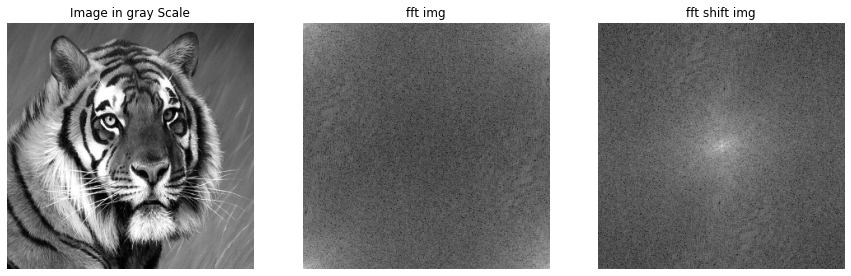

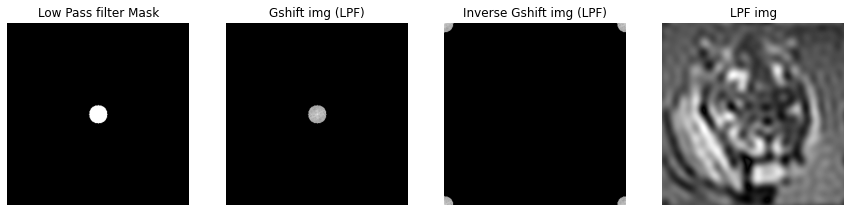

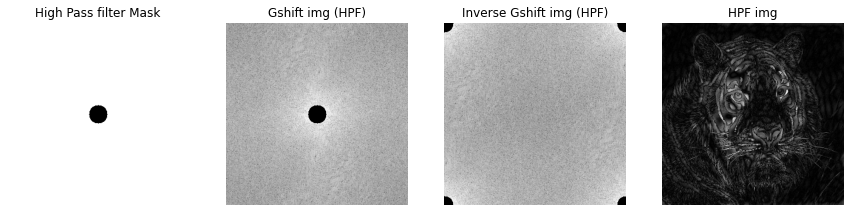

In [37]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# original image
img2 = cv2.imread(r'C:\Users\Function\Desktop\tiger.jpg',0)
img2 = cv2.resize(img2, (300,300))

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)


plt.subplot(1,3,1)
plt.title("Image in gray Scale")
plt.imshow(img2, cmap='gray')
plt.axis('off')

# image in frequency domain
fft_img2 = np.fft.fft2(img2)
plt.subplot(1,3,2)
plt.title("fft img")
plt.imshow(np.log1p(np.abs(fft_img2)), cmap='gray')
plt.axis('off')

fft_shift_img2 = np.fft.fftshift(fft_img2)
plt.subplot(1,3,3)
plt.title("fft shift img")
plt.imshow(np.log1p(np.abs(fft_shift_img2)), cmap='gray')
plt.axis('off')
plt.show()

# Filter: Low pass filter
M,N = img2.shape
Low = np.zeros((M,N))

D0 = 15
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            Low[u,v] = 1
        else:
            Low[u,v] = 0    
            
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,4,1)
plt.title("Low Pass filter Mask")
plt.imshow(Low, cmap='gray')
plt.axis('off')

# Ideal Low Pass Filtering
Gshift1_img2 = fft_shift_img2 *Low
plt.subplot(1,4,2)
plt.title("Gshift img (LPF)")
plt.imshow(np.log1p(np.abs(Gshift1_img2)), cmap='gray')
plt.axis('off')

# Inverse Fourier Transform
inv_Gshift1_img2 = np.fft.ifftshift(Gshift1_img2)
plt.subplot(1,4,3)
plt.title("Inverse Gshift img (LPF)")
plt.imshow(np.log1p(np.abs(inv_Gshift1_img2)), cmap='gray')
plt.axis('off')

abs_inv_Gshift1_img2 = np.abs(np.fft.ifft2(inv_Gshift1_img2))
plt.subplot(1,4,4)
plt.title("LPF img")
plt.imshow(abs_inv_Gshift1_img2, cmap='gray')
plt.axis('off')
plt.show()

# Filter: High pass filter
High = 1 - Low

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,4,1)
plt.title("High Pass filter Mask")
plt.imshow(High, cmap='gray')
plt.axis('off')

# Ideal High Pass Filtering
Gshift2_img2 = fft_shift_img2 * High
plt.subplot(1,4,2)
plt.title("Gshift img (HPF)")
plt.imshow(np.log1p(np.abs(Gshift2_img2)), cmap='gray')
plt.axis('off')

# Inverse Fourier Transform
inv_Gshift2_img2 = np.fft.ifftshift(Gshift2_img2)
plt.subplot(1,4,3)
plt.title("Inverse Gshift img (HPF)")
plt.imshow(np.log1p(np.abs(inv_Gshift2_img2)), cmap='gray')
plt.axis('off')

abs_inv_Gshift2_img2 = np.abs(np.fft.ifft2(inv_Gshift2_img2))
plt.subplot(1,4,4)
plt.title("HPF img")
plt.imshow(abs_inv_Gshift2_img2, cmap='gray')
plt.axis('off')
plt.show()

# 10) Hybrid Image:

In [38]:
hyb = Gshift1_img1 + Gshift2_img2

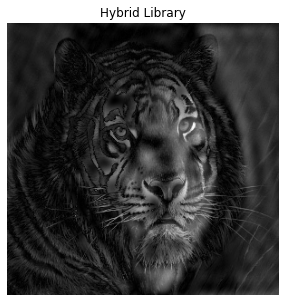

In [39]:
inv_hyb = np.fft.ifftshift(hyb)

abs_inv_hyb = np.abs(np.fft.ifft2(inv_hyb))

plt.figure(figsize=(5,5))
plt.title("Hybrid Library")
plt.imshow(abs_inv_hyb, cmap='gray')
plt.axis('off')
plt.show()